In [47]:
from features_trans_back import features_trans_back_shortened as ftbs
from features_trans_back import question_short as qs


def plot_conditional_probs(df, condition, ftbs, qs):
    # Data for the plot
    categories = ftbs(df.keys().name)
    categories_labels = list(categories.values())

    event_qs = df.keys().name

    condition_qs = df.reset_index().columns[0]

    # Creating the plot
    plt.figure(figsize=(10, 6))
    plt.bar(categories_labels, df.loc[condition], color='skyblue')

    # Adding title and labels
    plt.title(f"Distribution: {qs(event_qs)}  | {qs(condition_qs)}  {ftbs(condition_qs, condition)}" )
    # plt.xlabel("Education Degree")
    plt.ylabel("Conditional Probabilities")

    # Rotating the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    # plt.show()



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('coded.csv')
def calculate_conditional_probability_for_category(df, condition_column, condition_value, event_column, event_value):
    """
    Calculate conditional probability for a specific category in the condition column given the event column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - condition_column (str): The column for which conditional probability is calculated.
    - condition_value: The specific category in the condition column.
    - event_column (str): The column representing the event.
    - event_value: The specific category in the event column.
    """
    condition_occurrences = df[df[condition_column] == condition_value].shape[0]
    event_and_condition_occurrences = df[(df[condition_column] == condition_value) & (df[event_column] == event_value)].shape[0]

    if condition_occurrences == 0:
        return 0  # To avoid division by zero

    conditional_probability = event_and_condition_occurrences / condition_occurrences
    return conditional_probability



def calculate_conditional_probability(df, condition_column, event_column):
    # Group by the condition column and calculate the conditional probabilities
    probabilities = df.groupby(condition_column)[event_column].value_counts(normalize=True).unstack()

    # Fill NaN values with 0 (when the condition is not present for a specific event)
    probabilities = probabilities.fillna(0)

    return probabilities



def cramers_v(df, x, y):
    confusion_matrix = pd.crosstab(df[x], df[y])

    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# cramers_v_education_obligation = cramers_v(df, "Education", "Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?")
# print(cramers_v_education_obligation)


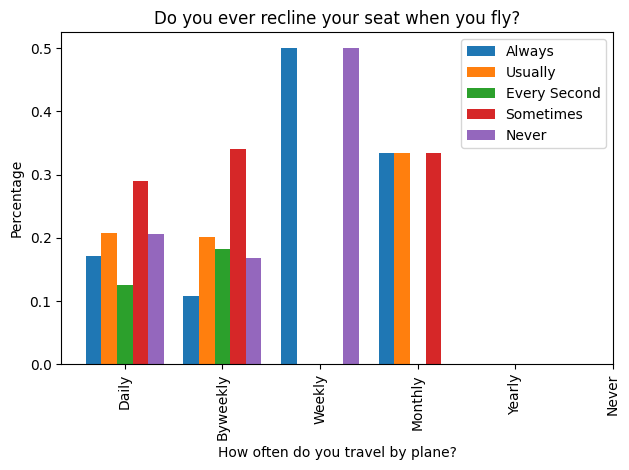

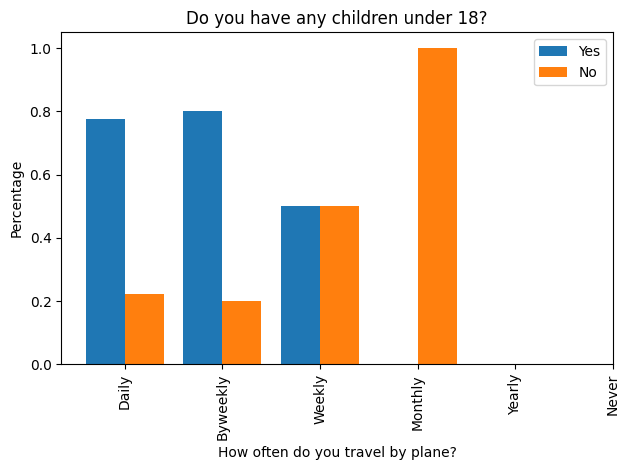

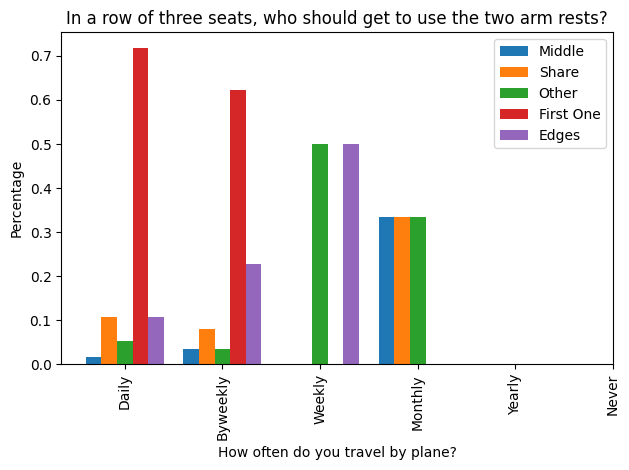

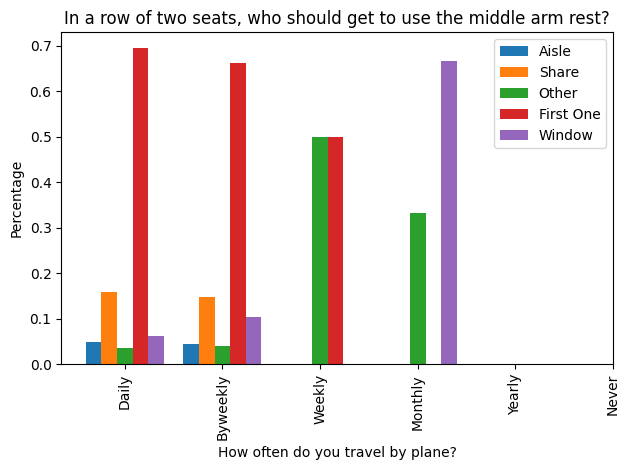

In [78]:
def many_plots (df, feature, calculate_conditional_probability, plot_conditional_probs, ftbs, qs):
    questions = list(df.columns)[1:]
    counter = 0 
    for q in questions:
        if q == feature:
            continue
        if q == 'How tall are you?':
            continue
        conditional_prob = calculate_conditional_probability(df, feature, q)
        
        # Assuming your DataFrames are named conditional_prob and conditional_prob2

        # Plot for 'Do you ever recline your seat when you fly?'

        # plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
        # plt.subplot(1, 2, 1)  # subplot for the first question
        conditional_prob.plot(kind='bar', stacked=False, width=0.8)
        plt.title(conditional_prob.columns.name)
        plt.xlabel(conditional_prob.index.name)
        plt.ylabel('Percentage')
        feature_name = ftbs(conditional_prob.columns.name)
        q_name = ftbs(conditional_prob.index.name)
        plt.xticks(range(len(q_name)), list(q_name.values()))
        plt.legend(list(feature_name.values()))

        plt.tight_layout()  # Adjust layout for better visualization
        plt.show();
        if counter==3:
            break
        counter+=1
many_plots(df, 'How often do you travel by plane?', calculate_conditional_probability, plot_conditional_probs, ftbs, qs)


In [70]:
df = pd.read_csv('coded.csv')
conditional_prob = calculate_conditional_probability(df, 'Age', list(df.columns)[2])
conditional_prob2 = calculate_conditional_probability(df, 'Age', list(df.columns)[4])
print(conditional_prob)
print(conditional_prob2)

print(conditional_prob.index.name)

Do you ever recline your seat when you fly?       0.0       1.0       2.0  \
Age                                                                         
0.0                                          0.122093  0.156977  0.122093   
1.0                                          0.157658  0.234234  0.148649   
2.0                                          0.213675  0.175214  0.145299   
3.0                                          0.120930  0.255814  0.130233   

Do you ever recline your seat when you fly?       3.0       4.0  
Age                                                              
0.0                                          0.319767  0.279070  
1.0                                          0.288288  0.171171  
2.0                                          0.299145  0.166667  
3.0                                          0.302326  0.190698  
Do you have any children under 18?       0.0       1.0
Age                                                   
0.0                            

<Figure size 1000x800 with 0 Axes>

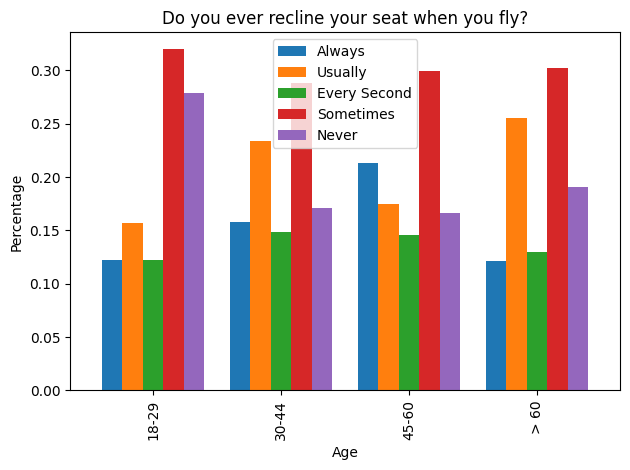

In [74]:
import pandas as pd
import matplotlib.pyplot as plt



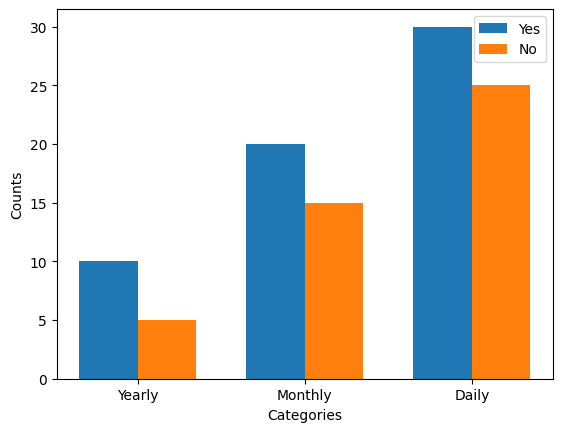

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Daten für das Beispiel
categories = ['Yearly', 'Monthly', 'Daily']
yes_data = [10, 20, 30]  # Beispielwerte für "Yes"
no_data = [5, 15, 25]    # Beispielwerte für "No"

bar_width = 0.35  # Breite der Balken

# Positionen der Balken für die Kategorien
bar_positions_yes = np.arange(len(categories))
bar_positions_no = bar_positions_yes + bar_width

# Erstellen der Balken für "Yes" und "No"
plt.bar(bar_positions_yes, yes_data, width=bar_width, label='Yes')
plt.bar(bar_positions_no, no_data, width=bar_width, label='No')

# Achsenbeschriftungen und Legende hinzufügen
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(bar_positions_yes + bar_width / 2, categories)
plt.legend()

# Diagramm anzeigen
plt.show()